In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [113]:
clean_df = df.drop(columns='Person ID', axis=1)
clean_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
clean_df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [8]:
clean_df.shape

(374, 12)

In [9]:
Categorical_Col = []
Numerical_Col = []

In [10]:
for col in clean_df.columns:
    if clean_df[col].dtype == 'object':
        Categorical_Col.append(col)

    else:
        Numerical_Col.append(col)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
LE = LabelEncoder()

In [13]:
for col in Categorical_Col:
    clean_df[col] = LE.fit_transform(clean_df[col])

In [14]:
clean_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,1,28,6,5.9,4,30,8,2,22,85,3000,2


<ipython-input-114-1c1127ec24ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(), cmap='jet', linewidths=1, linecolor='black', annot=True)


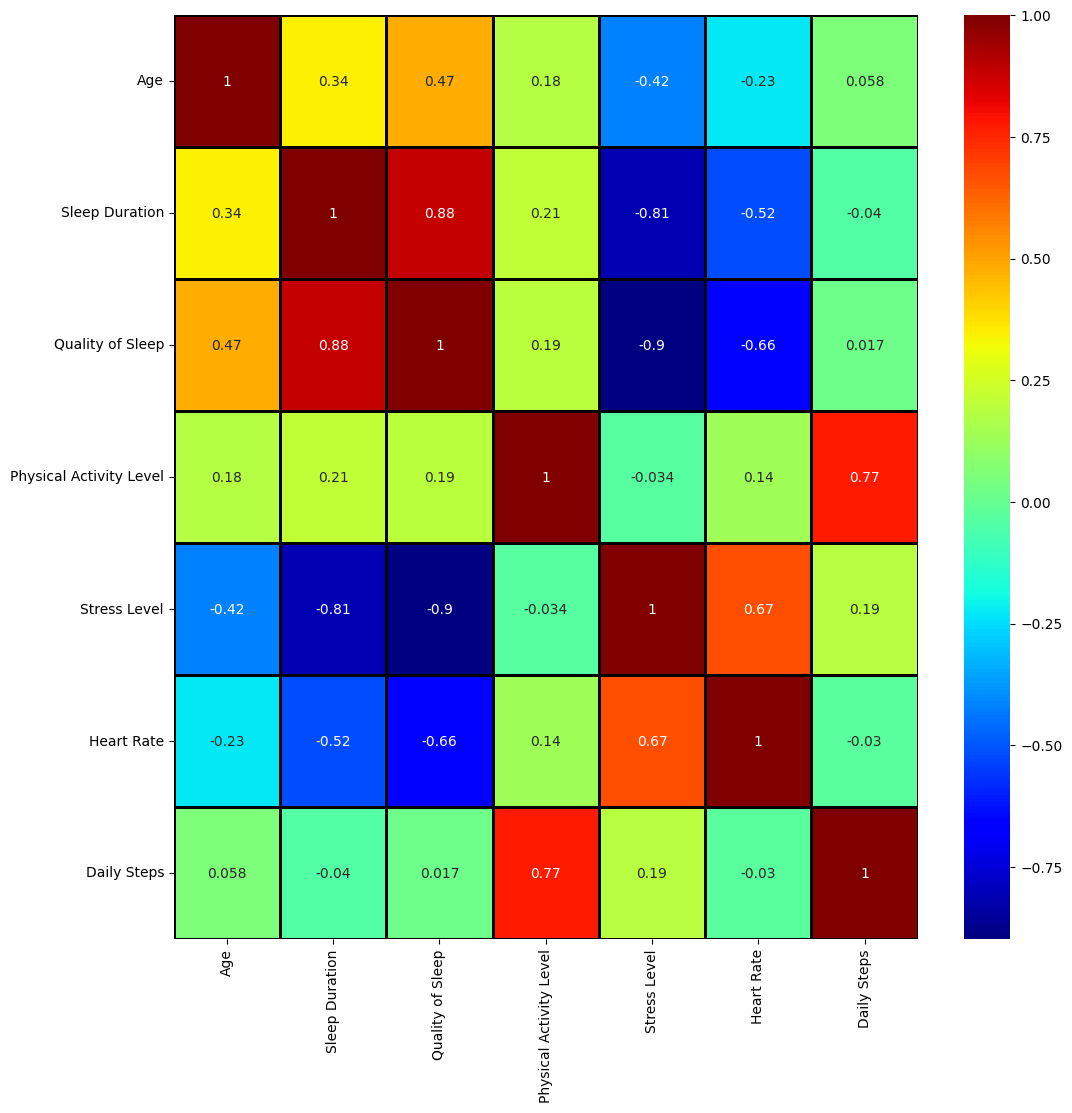

In [114]:
plt.figure(figsize=(12,12))
sns.heatmap(clean_df.corr(), cmap='jet', linewidths=1, linecolor='black', annot=True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = clean_df.iloc[:,:-1]
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,11,77,4200
1,1,28,1,6.2,6,60,8,0,9,75,10000
2,1,28,1,6.2,6,60,8,0,9,75,10000
3,1,28,6,5.9,4,30,8,2,22,85,3000
4,1,28,6,5.9,4,30,8,2,22,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,23,68,7000
370,0,59,5,8.0,9,75,3,3,23,68,7000
371,0,59,5,8.1,9,75,3,3,23,68,7000
372,0,59,5,8.1,9,75,3,3,23,68,7000


In [17]:
y = clean_df['Sleep Disorder']
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
from sklearn.svm import SVC

In [97]:
clf = SVC(kernel='linear')

In [98]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [99]:
y_hat = clf.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
print(accuracy_score(y_test, y_hat))

0.8936170212765957


In [102]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        17
           1       0.96      0.95      0.95        55
           2       0.94      0.77      0.85        22

    accuracy                           0.89        94
   macro avg       0.86      0.87      0.86        94
weighted avg       0.91      0.89      0.90        94

